In [220]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [221]:
# Create list of all targets (minus background noise)
dataset_path = './recording'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['ㄏㄧㄡ', 'ㄟ', '吼', '啦', '嗯', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [222]:
# Settings
feature_sets_path = './'
feature_sets_filename = './recording23.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [223]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [224]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 8.  7.  5.  7.  3.  0.  8. 10. 10.  3. 10.  8.  8.  4.  1.  9.  6. 11.
 11.  9.  6.  5. 11.  7.  1.  3.  4.  1. 10.  3. 11. 11.  4.  5.  9. 11.]
[ 4.  2.  6.  8.  0.  6.  1.  4.  8.  3.  8. 11. 10.  2. 10.  6.  7.  7.
  4.  2.  0.  5.  1.  1.  7.  6.  4.  7.  7.  1.  1.  1. 11.  7.  3.  6.
  4.  7.  8.  6.  2.  5.  5. 11.  8.  8.  4.  3.  8.  8.  0.  4. 11.  4.
  4.  5.  6.  1.  1.  8.  1.  4.  1.  9.  1.  2.  9.  6.  9.  1. 10.  0.
  5.  0.  8.  9.  5.  3.  2.  2.  3.  4.  8.  9.  0.  2.  3. 11.  0.  1.
 11.  7.  2.  6. 10.  7.  0.  3. 11.  9.  2.  3.  5.  7.  8. 10.  4.  8.
  6.  0.  2.  3.  7.  8.  5.  6.  4.  6. 11. 10.  2. 11. 10.  5.  5.  0.
  2.  9.  9.  3.  4.  5.  1.  0.  5. 11.  0.  3.  3.  1.  0.  5. 11.  3.
  9. 10. 10.  8.  0.  9.  6.  9.  8.  3. 10.  2.  8.  9.  6.  4.  6. 10.
  4.  2.  9. 10.  0.  2.  8.  1.  2.  1.  6.  1. 11.  7.  3.  1.  1.  9.
 11.  2. 11.  5. 10.  0.  4. 11. 10. 11. 10.  2.  7.  7.  8.  4.  7.  0.
  3.  0.  9.  6.  2.  7. 10.  8.  2.  7.  9.  7.  

In [225]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 23, 16)
(36, 23, 16)
(36, 23, 16)


In [226]:
# Peek at labels
print(y_val)

[ 6.  9.  1. 10. 11.  9.  8.  1.  8. 10. 10.  6.  3.  9.  4. 10.  9.  4.
  3.  1.  6.  5.  8.  9.  6.  2.  6.  9.  8.  3.  3. 10.  7.  0.  4.  7.]


In [227]:
# Peek at labels after conversion
print(y_test)

[ 8.  7.  5.  7.  3.  0.  8. 10. 10.  3. 10.  8.  8.  4.  1.  9.  6. 11.
 11.  9.  6.  5. 11.  7.  1.  3.  4.  1. 10.  3. 11. 11.  4.  5.  9. 11.]


In [228]:
# View the dimensions of our input data
print(x_train.shape)

(288, 23, 16)


In [229]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 23, 16, 1)
(36, 23, 16, 1)
(36, 23, 16, 1)


In [230]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [231]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model.add(layers.Conv2D(32, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='softmax'))
# Display model
model.summary()


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 5, 3, 64)          0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 5, 3, 64)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 960)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)              

In [232]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [233]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=100,
                    batch_size=20,
                    validation_data=(x_val, y_val))

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 4.2681 - acc: 0.1111 - val_loss: 2.5693 - val_acc: 0.0556
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 2.6740 - acc: 0.1181 - val_loss: 2.4555 - val_acc: 0.1389
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 2.4814 - acc: 0.1319 - val_loss: 2.4488 - val_acc: 0.0556
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 2.4418 - acc: 0.1424 - val_loss: 2.4279 - val_acc: 0.0833
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 2.3963 - acc: 0.1354 - val_loss: 2.3766 - val_acc: 0.0833
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 2.2906 - acc: 0.1979 - val_loss: 2.3066 - val_acc: 0.1667
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 2.2501 - acc: 0.2014 - val_loss: 2.2343 - val_acc: 0.1944
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 2.1919 - 

15/15 [==============================] - 0s 8ms/step - loss: 0.2789 - acc: 0.9062 - val_loss: 0.4158 - val_acc: 0.8056
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2965 - acc: 0.8958 - val_loss: 0.4416 - val_acc: 0.8056
Epoch 65/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2842 - acc: 0.8958 - val_loss: 0.3909 - val_acc: 0.8056
Epoch 66/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2535 - acc: 0.9271 - val_loss: 0.3748 - val_acc: 0.8611
Epoch 67/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3396 - acc: 0.8889 - val_loss: 0.4331 - val_acc: 0.8056
Epoch 68/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2544 - acc: 0.9167 - val_loss: 0.3836 - val_acc: 0.8056
Epoch 69/100
15/15 [==============================] - 0s 8ms/step - loss: 0.2666 - acc: 0.9028 - val_loss: 0.3606 - val_acc: 0.8333
Epoch 70/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1994 - acc: 0

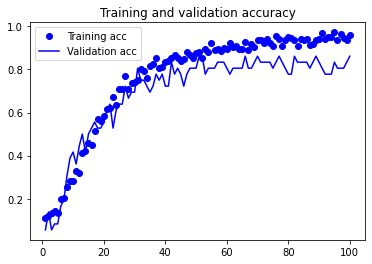

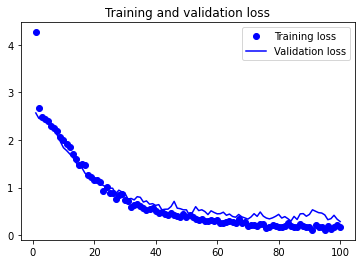

In [234]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [235]:
# Save the model as a file
models.save_model(model, './h5/recording23.h5')

In [236]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/recording23.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 8.0  Prediction: [[7.7170341e-07 6.7720214e-07 1.2239425e-08 1.0102544e-05 9.1334451e-03
  1.0001863e-03 8.9932048e-01 1.5631380e-02 7.4790291e-02 2.3238368e-07
  1.0916265e-04 3.2010325e-06]]
Answer: 7.0  Prediction: [[2.4337703e-04 2.4180707e-04 3.4571791e-04 2.8329002e-04 1.3828160e-01
  4.6921752e-02 2.8263536e-01 4.3691817e-01 2.8202077e-02 1.1773586e-02
  5.3790383e-02 3.6289502e-04]]
Answer: 5.0  Prediction: [[8.1522339e-06 2.8254910e-05 5.4255605e-07 4.8344464e-07 9.7444732e-05
  9.9957365e-01 1.0502384e-05 8.5845379e-05 1.9456325e-04 2.7466454e-08
  4.8181903e-07 1.4041021e-08]]
Answer: 7.0  Prediction: [[0.00548382 0.01187502 0.00396691 0.0044921  0.07582843 0.1335513
  0.3441437  0.35576946 0.00852233 0.00518534 0.04634767 0.00483395]]
Answer: 3.0  Prediction: [[5.29267068e-04 1.96795440e-06 2.38767061e-05 9.87602890e-01
  9.76871979e-06 2.81757053e-07 5.52930578e-06 2.53912663e-06
  6.66958094e-03 4.52228915e-03 1.18704396e-04 5.13361068e-04]]
Answer: 0.0  Predictio

In [237]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2395 - acc: 0.9444


[0.2395038902759552, 0.9444444179534912]